In [2]:
import sys, cv2
import numpy as np
import tracktor_revised as tr
import matplotlib.pyplot as plt
import pickle

In [3]:
# Open video file.
video_file        = 'SF_n1_t4.mp4'
cap               = cv2.VideoCapture(video_file)
n_frames          = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps               = cap.get(cv2.CAP_PROP_FPS)
print(f'{n_frames} frames, {fps} frames per second.')

# Contour detection parameters.
block_size,offset = 15,13
min_area,max_area = 20,1000
n_pix             = 5

54382 frames, 30.0 frames per second.


In [19]:
# List of frames to analyze.
frameID_list = range(5000,50000,500)

# Data structure to hold only the pixels belonging to a fish and their brightness.
fish = []

for i in frameID_list:
    
    # Load the frame.
    cap.set(cv2.CAP_PROP_POS_FRAMES, i-1)
    ret,frame = cap.read()
    
    # Detect the contours.
    contours  = tr.contour_detect(frame,min_area,max_area,block_size,offset,n_pix)
    
    # Make a mask with value j inside fish number j and -1 elsewhere. 
    mask      = 0*cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) - 1
    for j in range(len(contours)):
        cv2.drawContours(mask, contours, j, j, -1)
    
    # Make and save a list of each fish's pixels.
    pixels    = [ np.nonzero(mask==j) for j in range(len(contours)) ]
    fish.append(np.concatenate([np.array(pixels[0]),frame[pixels[0]].T]))
    
with open('fish.pkl','wb') as fh:
     pickle.dump(fish,fh)

In [3]:
with open('fish.pkl','rb') as fh:
     fish=pickle.load(fh)

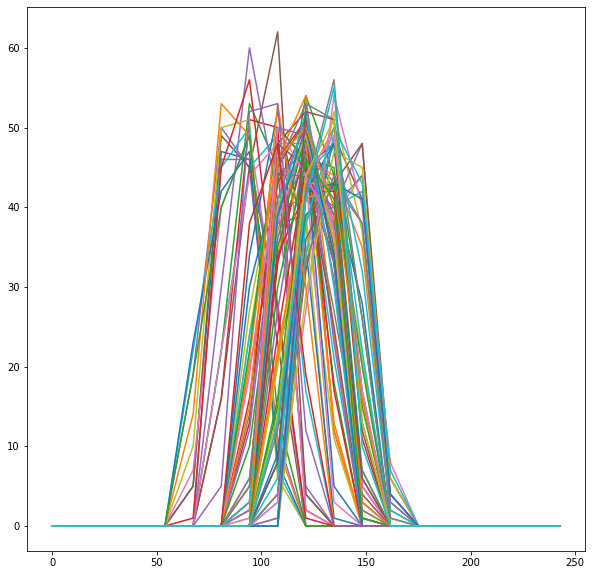

In [5]:
#Converts pickleFish to greyscale, then stores greyscale values in greyValueArray
greyValueArray=[]
greyArray=[]
for j in range(len(fish)):
    for i in range(len(fish[j].T)):
        greyscaleValue=round(.3*fish[j].T[i,2]+.59*fish[j].T[i,3]+.11*fish[j].T[i,4],2)
        greyValueArray.append(greyscaleValue)
    greyArray.append(greyValueArray)
    greyValueArray=[]

#Greyscale histogram of all frames
bins=np.linspace(0,256,20)
plt.figure(figsize=(10,10))
for i in range(len(greyArray)):
    histArray=np.histogram(greyArray[i],bins=bins)
    plt.plot(histArray[1][:-1],histArray[0])
plt.show()

In [5]:
#Creates a greyscale version of fish
greyFish=[]
for i in range(len(fish)):
    subGreyFish=[]
    subGreyFish=np.array([fish[i][0],fish[i][1],.3*fish[i][2]+.59*fish[i][3]+.11*fish[i][4]])
    greyFish.append(subGreyFish)

In [7]:
#Creates an array of the distance, brightness sum and brightness difference for the frame of greyFish 
greyFrame=greyFish[0]

pairFrameData=[]
for i in range(greyFrame.shape[1]):
    for j in range(i):
        distance=np.sqrt((greyFrame[0][i]-greyFrame[0][j])**2+(greyFrame[1][i]-greyFrame[1][j])**2)
        brightness=greyFrame[2][i]+greyFrame[2][j]
        difference=np.absolute(greyFrame[2][i]-greyFrame[2][j])
        pairFrameData.append([distance,brightness,difference])
pairFrameData=np.array(pairFrameData).T

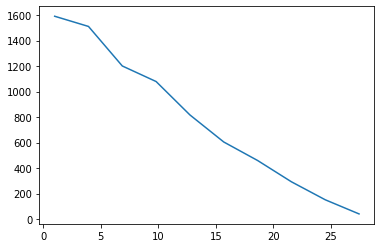

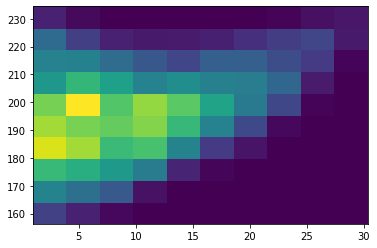

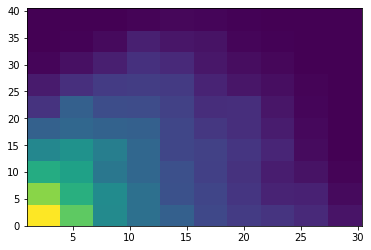

In [8]:
#Creates a 2d histogram of the first frame of greyFish using sum then difference of brightnesses
histArray=np.histogram(pairFrameData[0])
plt.plot(histArray[1][:-1],histArray[0])
plt.show()

plt.hist2d(pairFrameData[0],pairFrameData[1])
plt.show()

plt.hist2d(pairFrameData[0],pairFrameData[2])
plt.show()

In [12]:
#Creates an array of the distance difference[0], brightness sum[1], and brightness difference[2] for every frame of greyFish
bins=np.linspace(0,500,20)
histDifferenceData=[]
for k in range(len(greyFish)):
    pairsData=[]
    for i in range(greyFish[k].shape[1]):
        for j in range(i):
            distance=np.sqrt((greyFish[k][0][i]-greyFish[k][0][j])**2+(greyFish[k][1][i]-greyFish[k][1][j])**2)
            brightness=greyFish[k][2][i]+greyFish[k][2][j]
            difference=np.absolute(greyFish[k][2][i]-greyFish[k][2][j])
            pairsData.append([distance,brightness,difference])
    pairsData=np.array(pairsData).T
    histDifferenceData.append(np.histogram2d(pairsData[0],pairsData[2],bins=[10,10]))

In [13]:
print(histDifferenceData[0])

(array([[462., 380., 285., 213., 142.,  68.,  34.,   7.,   0.,   0.],
       [347., 291., 264., 235., 152., 139.,  62.,  19.,   2.,   0.],
       [219., 221., 183., 196., 144., 108.,  80.,  39.,  11.,   0.],
       [169., 168., 152., 153., 140., 106.,  82.,  64.,  41.,   4.],
       [139., 115., 113.,  97.,  96.,  89.,  79.,  54.,  26.,   9.],
       [100.,  95.,  88.,  89.,  73.,  58.,  44.,  28.,  23.,   7.],
       [ 81.,  71.,  66.,  71.,  61.,  60.,  26.,  16.,   6.,   2.],
       [ 70.,  44.,  37.,  48.,  36.,  27.,  18.,   9.,   3.,   1.],
       [ 53.,  42.,  22.,  13.,  10.,   7.,   5.,   0.,   0.,   0.],
       [ 24.,  12.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]), array([ 1.        ,  3.93644529,  6.87289058,  9.80933587, 12.74578116,
       15.68222645, 18.61867174, 21.55511703, 24.49156232, 27.42800761,
       30.3644529 ]), array([ 0.   ,  4.046,  8.092, 12.138, 16.184, 20.23 , 24.276, 28.322,
       32.368, 36.414, 40.46 ]))


In [14]:
#Calculates the euclidan difference between the first frame of histDifferenceData and every other frame using: the distance in [0], the brightnes sums in [1], and the brightness diffrerence in [2]
twodDifferenceArray=[]
for i in range(len(histDifferenceData)):
    twodDifferenceSubArray=[]
    twodDifferenceSubArray=[np.linalg.norm(histDifferenceData[i][0]-histDifferenceData[0][0]),np.linalg.norm(histDifferenceData[i][1]-histDifferenceData[0][1]),np.linalg.norm(histDifferenceData[i][2]-histDifferenceData[0][2])]
    twodDifferenceArray.append(twodDifferenceSubArray)
twodDifferenceArray=np.array(twodDifferenceArray).T

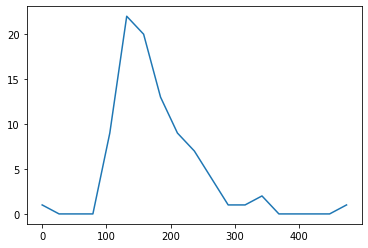

In [15]:
#Plots histogram of distance values
histArray=np.histogram(twodDifferenceArray[0],bins=bins)
plt.plot(histArray[1][:-1],histArray[0])
plt.show()